# HMS HBA EDA and FFTs

# Imports

In [26]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])



# Load a single EEG file

In [27]:
eeg = pd.read_parquet('./eeg1.parquet')
eeg.head()

orig_cols = eeg.columns

In [28]:
# create a time column with 200 hz sampling rate
eeg['time'] = np.arange(0, len(eeg)) / 200
# set the index of the eeg dataframe to the time column
eeg.set_index('time', inplace=True)

eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
time,,,,,,,,,,,,,,,,,,,,
0.000,18.870001,26.049999,35.619999,52.369999,-3.19,40.410000,39.080002,11.43,24.190001,7.98,59.279999,-33.230000,26.049999,2.39,16.48,3.46,3.72,-19.940001,-4848.370117,488.609985
0.005,23.930000,28.980000,37.750000,52.900002,1.86,44.130001,39.340000,10.63,25.250000,5.85,56.889999,-31.629999,26.049999,2.13,13.56,2.13,7.44,-23.389999,-4859.799805,498.450012
0.010,15.680000,21.799999,32.169998,45.990002,-7.71,35.090000,30.840000,2.39,18.610001,0.80,50.240002,-38.279999,16.480000,-7.98,4.52,-7.71,-4.52,-30.570000,-4864.850098,490.739990
0.015,6.380000,18.340000,28.980000,41.470001,-14.89,24.190001,23.930000,0.53,15.950000,0.27,48.910000,-48.119999,11.700000,-12.76,1.86,-15.95,-10.10,-34.820000,-4858.729980,490.209991
0.020,11.170000,26.850000,37.220001,49.709999,-9.57,33.500000,29.770000,3.72,24.190001,6.38,54.759998,-41.740002,19.139999,-7.98,6.91,-11.43,-4.79,-28.180000,-4862.189941,514.929993


In [29]:
# access the row at time = 1.0 sec
eeg.loc[1.0]

Fp1      20.740000
F3       13.560000
C3        1.600000
P3        0.000000
F7      -10.370000
T3        6.380000
T5      -21.530001
O1      -27.379999
Fz       18.870001
Cz      -13.820000
Pz       21.530001
Fp2     -24.719999
F4       32.959999
C4       -5.320000
P4       -3.460000
F8       15.420000
T4       19.410000
T6      -36.150002
O2    -4883.189941
EKG     517.059998
Name: 1.0, dtype: float32

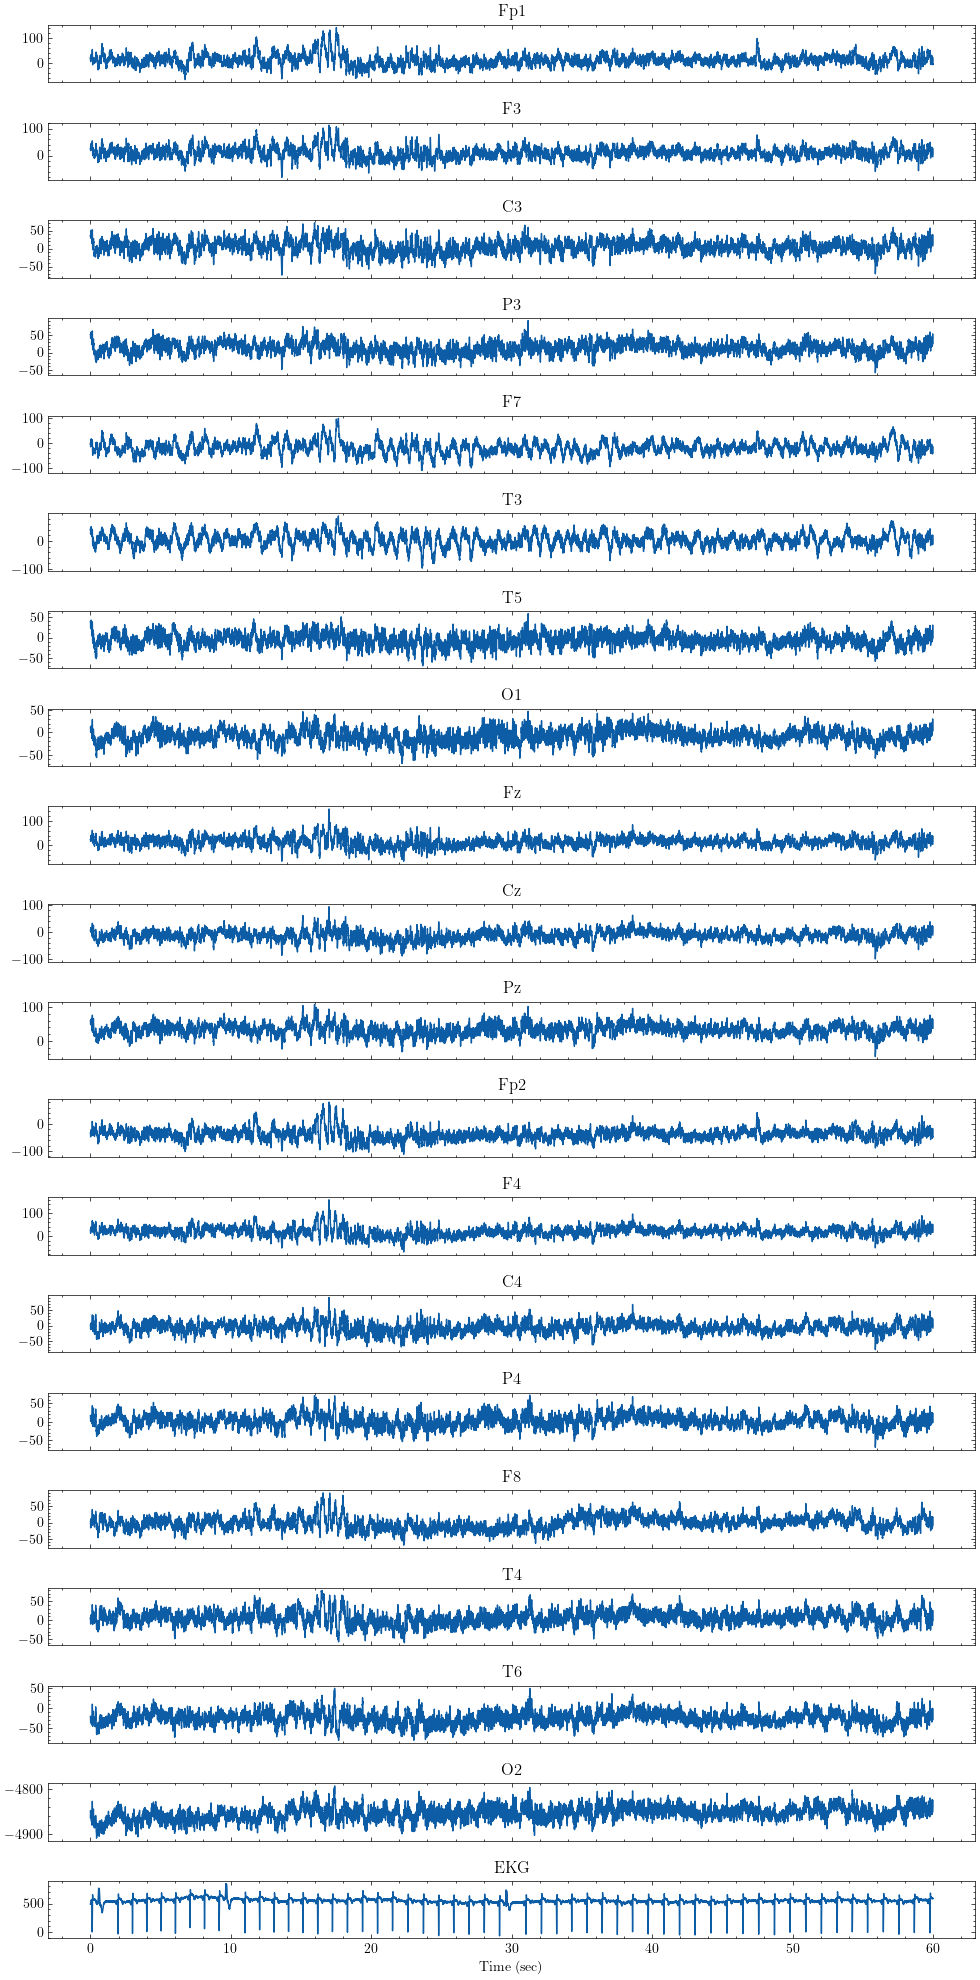

In [30]:
# plot all eeg cols in a single column vs time and len(eeg.columns) rows with a shared x axis labeled 'Time (sec)' at the bottom
def plot_eeg(eeg):
    fig, axes = plt.subplots(len(eeg.columns), 1, figsize=(10, 20), sharex=True)
    for i, col in enumerate(eeg.columns):
        axes[i].plot(eeg.index, eeg[col])
        axes[i].set_title(col)
    plt.xlabel('Time (sec)')
    plt.tight_layout()
    plt.show()

plot_eeg(eeg)


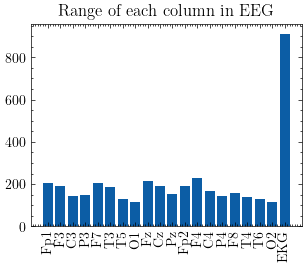

In [31]:
# make a bar plot the range of each column in diff_cols
ranges = [eeg[col].max() - eeg[col].min() for col in orig_cols]
plt.bar(orig_cols, ranges)
plt.xticks(rotation=90)
plt.title('Range of each column in EEG')
plt.show()

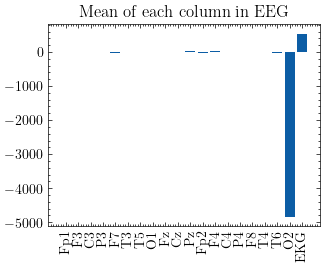

In [32]:
# make a bar plot of the mean of each column in diff_cols
means = [eeg[col].mean() for col in orig_cols]
plt.bar(orig_cols, means)
plt.xticks(rotation=90)
plt.title('Mean of each column in EEG')
plt.show()


* O2 is way off from others...normalize means before differentials?

# Look at differentials

In [33]:
# create differentials
def create_differentials(eeg):
    
    # LL (Left Temporal Chain)
    eeg['Fp1-F7'] = eeg.Fp1 - eeg.F7
    eeg['F7-T3'] = eeg.F7 - eeg.T3
    eeg['T3-T5'] = eeg.T3 - eeg.T5
    eeg['T5-O1'] = eeg.T5 - eeg.O1
    
    # LP (Left Parasagittal Chain)
    eeg['Fp1-F3'] = eeg.Fp1 - eeg.F3
    eeg['F3-C3'] = eeg.F3 - eeg.C3
    eeg['C3-P3'] = eeg.C3 - eeg.P3
    eeg['P3-O1'] = eeg.P3 - eeg.O1
    
    # RP (Right Parasagittal Chain)
    eeg['Fp2-F4'] = eeg.Fp2 - eeg.F4
    eeg['F4-C4'] = eeg.F4 - eeg.C4
    eeg['C4-P4'] = eeg.C4 - eeg.P4
    eeg['P4-O2'] = eeg.P4 - eeg.O2
    
    # RR (Right Temporal Chain)
    eeg['Fp2-F8'] = eeg.Fp2 - eeg.F8
    eeg['F8-T4'] = eeg.F8 - eeg.T4
    eeg['T4-T6'] = eeg.T4 - eeg.T6
    eeg['T6-O2'] = eeg.T6 - eeg.O2

    # Central Chain
    eeg['Fz-Cz'] = eeg.Fz - eeg.Cz
    eeg['Cz-Pz'] = eeg.Cz - eeg.Pz

    return eeg

eeg = create_differentials(eeg)

eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,...,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T4,T4-T6,T6-O2,Fz-Cz,Cz-Pz
time,,,,,,,,,,,,,,,,,,,,,
0.000,18.870001,26.049999,35.619999,52.369999,-3.19,40.410000,39.080002,11.43,24.190001,7.98,...,-59.279999,23.660000,-14.089999,4864.850098,-36.689999,-0.260000,23.660000,4828.430176,16.210001,-51.299999
0.005,23.930000,28.980000,37.750000,52.900002,1.86,44.130001,39.340000,10.63,25.250000,5.85,...,-57.680000,23.919998,-11.430000,4873.359863,-33.759998,-5.310000,30.830000,4836.409668,19.400000,-51.040001
0.010,15.680000,21.799999,32.169998,45.990002,-7.71,35.090000,30.840000,2.39,18.610001,0.80,...,-54.759998,24.459999,-12.500000,4869.370117,-30.570000,-3.190000,26.049999,4834.280273,17.810001,-49.440002
0.015,6.380000,18.340000,28.980000,41.470001,-14.89,24.190001,23.930000,0.53,15.950000,0.27,...,-59.820000,24.459999,-14.620000,4860.589844,-32.169998,-5.849999,24.719999,4823.910156,15.679999,-48.639999
0.020,11.170000,26.850000,37.220001,49.709999,-9.57,33.500000,29.770000,3.72,24.190001,6.38,...,-60.880001,27.119999,-14.889999,4869.100098,-30.310001,-6.640000,23.389999,4834.009766,17.810001,-48.379997


In [34]:
diff_cols = [col for col in eeg.columns if '-' in col]

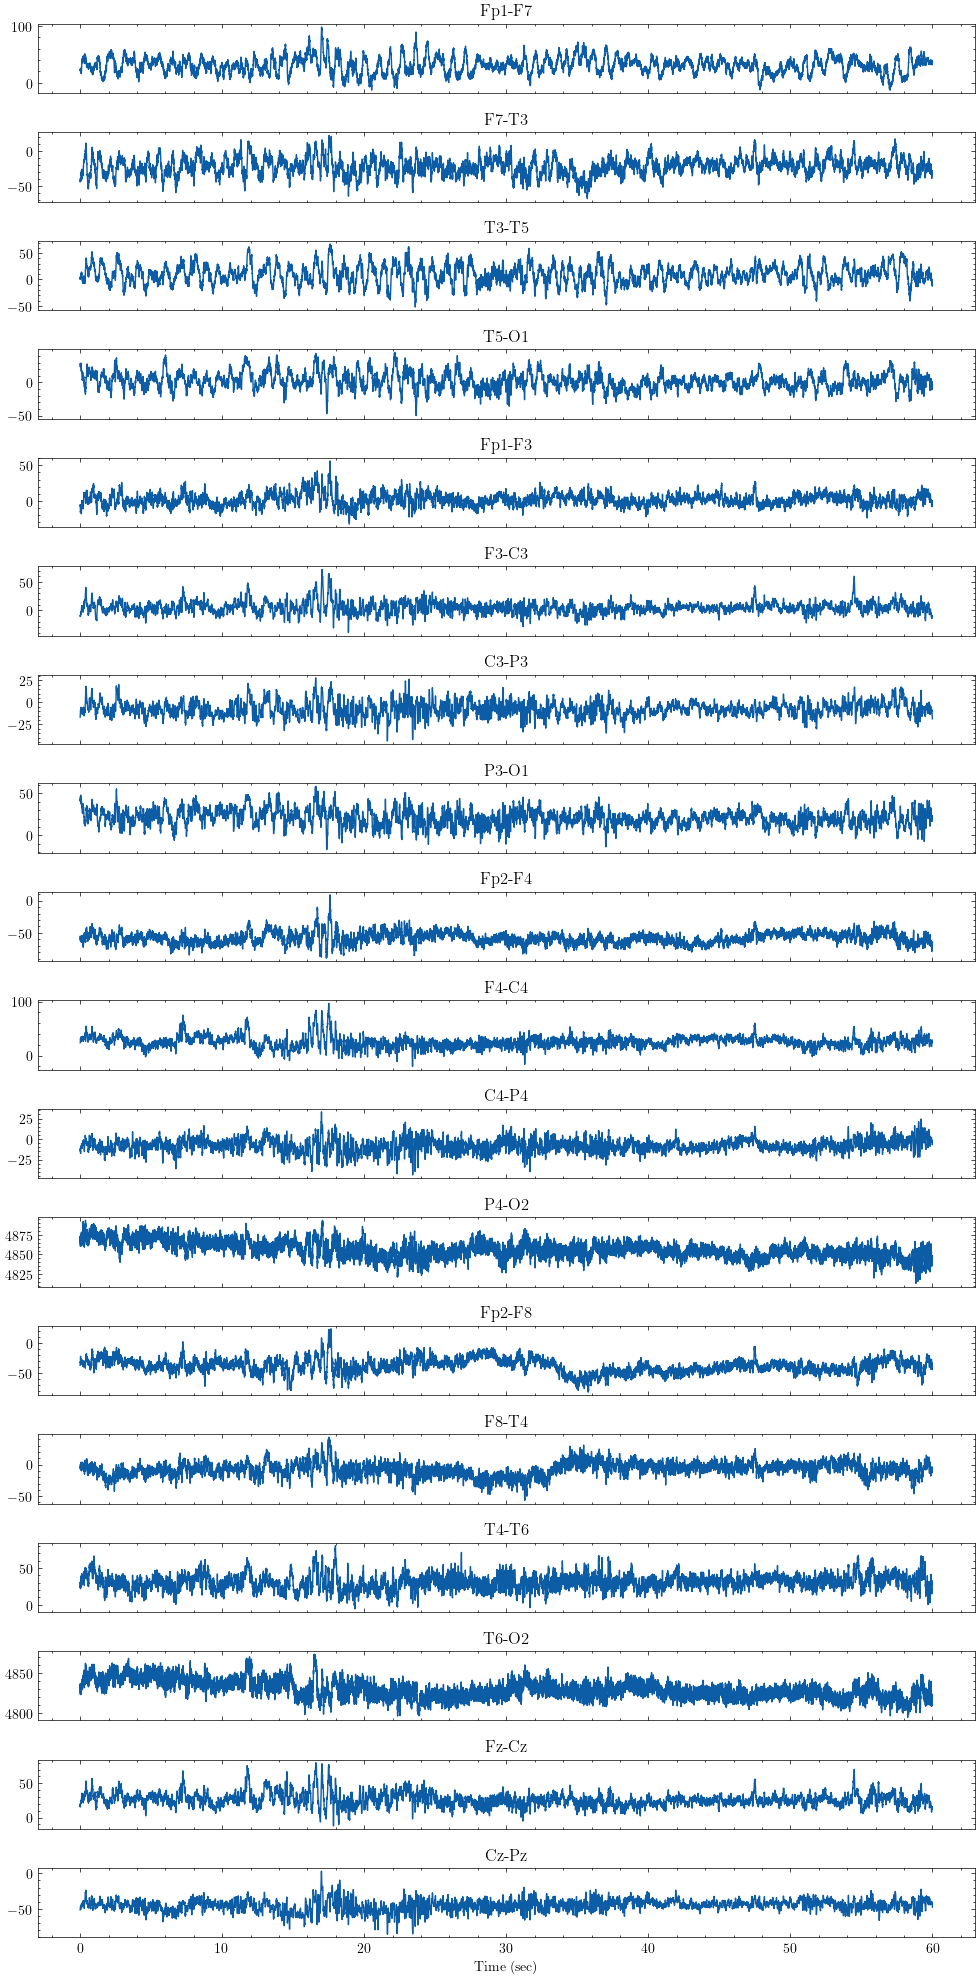

In [35]:
# plot differentials using plot_eeg
plot_eeg(eeg[diff_cols])


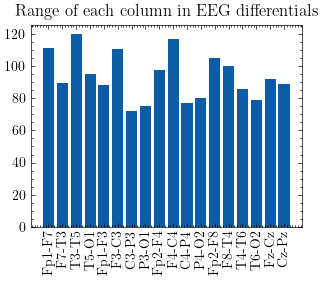

In [36]:
# make a bar plot the range of each column in diff_cols
ranges = [eeg[col].max() - eeg[col].min() for col in diff_cols]
plt.bar(diff_cols, ranges)
plt.xticks(rotation=90)
plt.title('Range of each column in EEG differentials')
plt.show()